<a href="https://colab.research.google.com/github/KhenCahyo13/Machine-Learning-Collection/blob/main/linear_regression/Simple_Linear_Regression_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of land prices in Jakarta based on land size (m2) with the Simple Linear Regression method and 2023 dataset.

# Create a Model

In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.metrics import mean_absolute_error, mean_squared_error;

dataurl = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS6e0ZMDAvPT5XANEB4P7WE52UEB7TxbqeQn2JLK4VpDTa4D9OkPLgY3guSXUg8j1hgoWeBmsLuqdQy/pub?gid=0&single=true&output=csv';
data = pd.read_csv(dataurl);

# Count mean from Land Prices (y) and Land Size (x)
mean_y = data['price(rp)'].mean(); # Dependen variable
mean_x = data['size(m2)'].mean(); # Independen variable

# Count Slope Coefficient -> Slope, Beta 1
data['Xi - X'] = data['size(m2)'] - mean_x;
data['Yi - Y'] = data['price(rp)'] - mean_y;
data['(Xi - X)(Yi - Y)'] = data['Xi - X'] * data['Yi - Y'];
data['(Xi - X)^2'] = data['Xi - X'] ** 2;

sum_Xi_X_Yi_Y = data['(Xi - X)(Yi - Y)'].sum();
sum_Xi_X_sq = data['(Xi - X)^2'].sum();

beta_1 = sum_Xi_X_Yi_Y / sum_Xi_X_sq;

# Count Intercept -> Intercept, Beta 0
beta_0 = mean_y - beta_1 * mean_x

print(f'Linear Regression Model: Land Prices = {beta_0} + {beta_1} * Land Size')

Linear Regression Model: Land Prices = 0.0 + 15500000.0 * Land Size


# Create a Function for Prediction

In [ ]:
def predict_price(size):
  return beta_0 + beta_1 * size;

# Price Prediction

In [ ]:
size = 610;
predicted_price = predict_price(size);
print(f'Land Price prediction by Land Size {size} m2 is Rp{predicted_price}')

Land Price prediction by Land Size 610 m2 is Rp9455000000.0


# Model Accuration

In [ ]:
# Count prediction for all data
predicted_prices = data['size(m2)'].apply(predict_price);

# Actual Value
actual_prices = data['price(rp)'];

# Count MAE and MSE
mae = mean_absolute_error(actual_prices, predicted_prices);
mse = mean_squared_error(actual_prices, predicted_prices);

print(f'Mean Absolute Error (MAE): {mae}');
print(f'Mean Squared Error (MSE): {mse}');

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0



# Regression Line Visualization



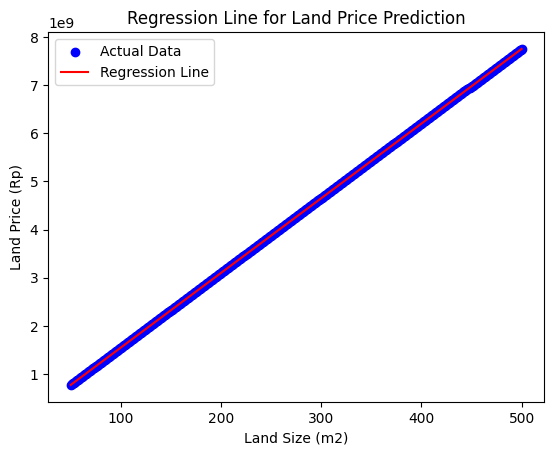

In [ ]:
plt.scatter(data['size(m2)'], data['price(rp)'], color='blue', label='Actual Data');
plt.plot(data['size(m2)'], predicted_prices, color='red', label='Regression Line');

plt.xlabel('Land Size (m2)');
plt.ylabel('Land Price (Rp)');
plt.title('Regression Line for Land Price Prediction');
plt.legend();

plt.show();